# Simple Classification

## 1. Setup

In [22]:
import torch
from torch import nn, optim
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

In [ ]:
from common.plot_tools import plot_data, plot_model, set_default

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
torch.manual_seed(12345)

In [13]:
n_samples_per_class = 1000
n_classes = 4
n_dims = 2

In [18]:
set_default()

## 2. Creating an artificial dataset

In [41]:
X = torch.zeros(n_samples_per_class * n_classes, n_dims).to(device)
y = torch.zeros(n_samples_per_class * n_classes, dtype=torch.long).to(device)

for c in range(n_classes):
    index = 0
    t = torch.linspace(0, 1, n_samples_per_class)
    inner_var = torch.linspace(
        (2 * math.pi / n_classes) * (c),
        (2 * math.pi / n_classes) * (2 + c),
        n_samples_per_class
    ) + torch.randn(n_samples_per_class) * 0.2
    
    for ix in range(n_samples_per_class * c, n_samples_per_class * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (4000, 2)
y: (4000,)


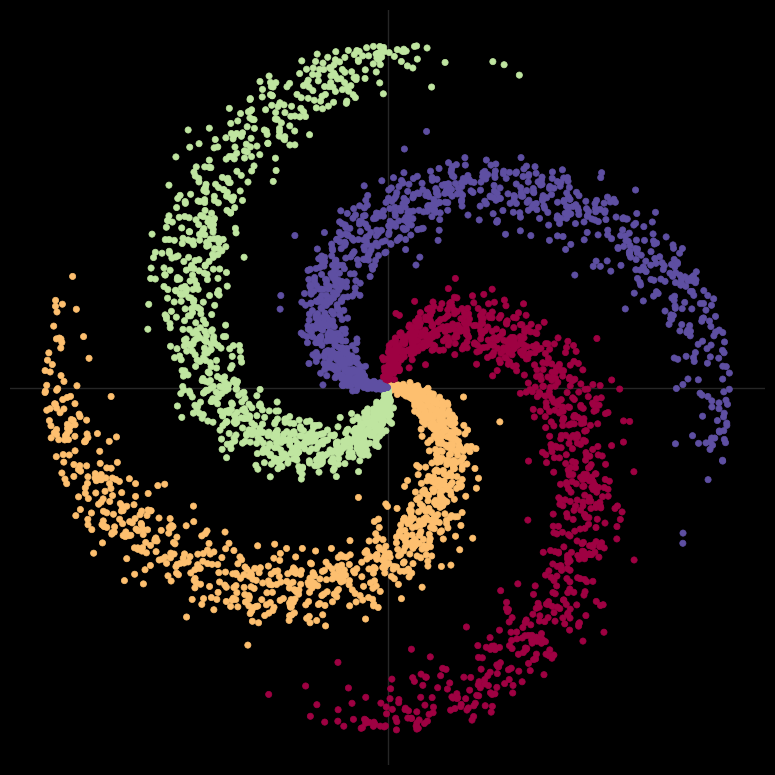

In [42]:
# visualise the data
plot_data(X, y)

## 3. Linear Model

In [46]:
learning_rate = 1e-3
lambda_l2 = 1e-5
n_hidden = 100

In [47]:
# create the model
model = nn.Sequential(
  nn.Linear(n_dims, n_hidden),
  nn.Linear(n_hidden, n_classes)                     
)

# send it to the device
model.to(device)

# create the loss criterion
criterion = nn.CrossEntropyLoss()

# create the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

In [51]:
# training loop
for t in range(1000):
  
  # feed the input forward through the network
  y_pred = model(X)

  # compute th loss
  loss = criterion(y_pred, y)
  _, predicted = torch.max(y_pred, dim=1)
  acc = (y == predicted).sum().float() / len(y)
  print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
  display.clear_output(wait=True)

  # zero the gradients
  optimizer.zero_grad()

  # backward pass to compute the gradients
  loss.backward()

  # update params
  optimizer.step()

[EPOCH]: 999, [LOSS]: 0.979866, [ACCURACY]: 0.494


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=4, bias=True)
)


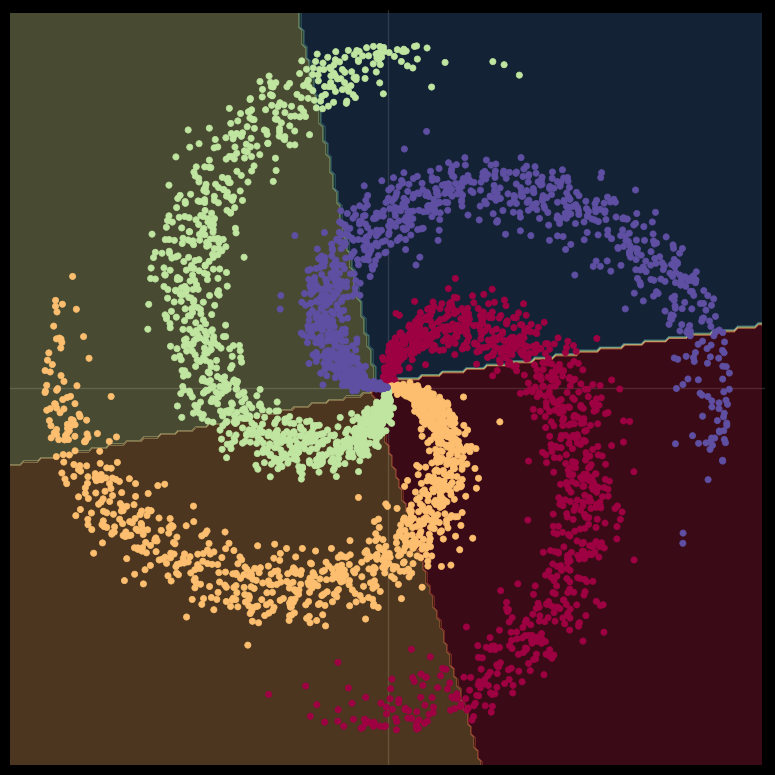

In [53]:
# Plot trained model
print(model)
plot_model(X, y, model)

## 4. Non-linear Model

In [54]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [55]:
# create the model
model = nn.Sequential(
    nn.Linear(n_dims, n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_classes)
)

# send to device
model.to(device)

# loss criterion
criterion = torch.nn.CrossEntropyLoss()

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

In [56]:
# training loop
for t in range(1000):
    
    # feed the input forward into the network
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    _, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the grads
    optimizer.zero_grad()
    
    # compute the gradients 
    loss.backward()
    
    # update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.234790, [ACCURACY]: 0.945


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=4, bias=True)
)


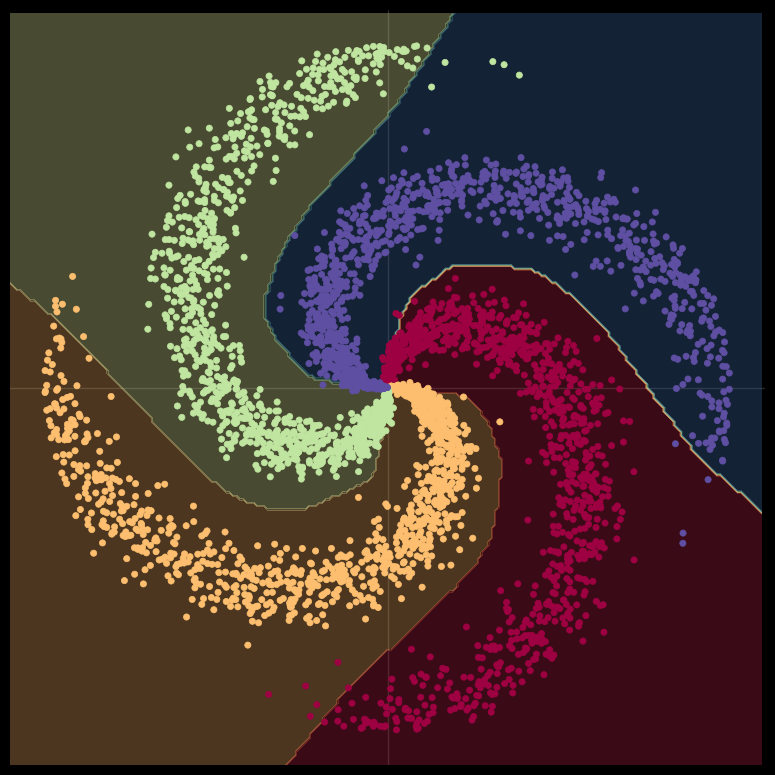

In [57]:
# Plot trained model
print(model)
plot_model(X, y, model)